In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from sqlalchemy import create_engine
#engine = create_engine(f"mysql+mysqlconnector://{'root'}:{'ducat123'}@{'localhost'}/{'e_commerce'}")

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='ducat123',
    database='e_commerce'
)
# Create a cursor object
cur = db.cursor(buffered=True)

### 1>.   List all unique cities where customers are located.


In [4]:
# SQL query to fetch distinct customer cities
query = 'SELECT DISTINCT customer_city FROM e_commerce.customers'
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### 2>.  Count the number of orders placed in 2017.

In [5]:
 # SQL query to fetch distinct customer cities
query = 'SELECT count(order_id) as placed_Order_in_2027 FROM e_commerce.orders where year(order_purchase_timestamp) = 2017'
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
"Total order placed in 2017 are : ",data[0][0]

('Total order placed in 2017 are : ', 45101)

### 3>. Find the total sales per category.


In [6]:
query = """SELECT upper(p.product_category) as product_Category,round(sum(pm.payment_value),2) as Count_product_wise
FROM e_commerce.order_items oi
JOIN e_commerce.products p ON oi.product_id = p.product_id
JOIN e_commerce.payments pm ON oi.order_id = pm.order_id
group by p.product_category order by Count_product_wise desc"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
df = pd.DataFrame(data,columns=["Category","Sales"])
#"Total sales per category : ",data
df

,Category,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


### 4>. Calculate the percentage of orders that were paid in installments.

In [7]:
query = """SELECT (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 FROM e_commerce.payments"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
# df = pd.DataFrame(data)   # columns=["Category","Sales"]
#"Total sales per category : ",data
"the percentage of orders that were paid in installments :",data[0]

('the percentage of orders that were paid in installments :',
 (Decimal('99.9981'),))

### 5>. Count the number of customers from each state.

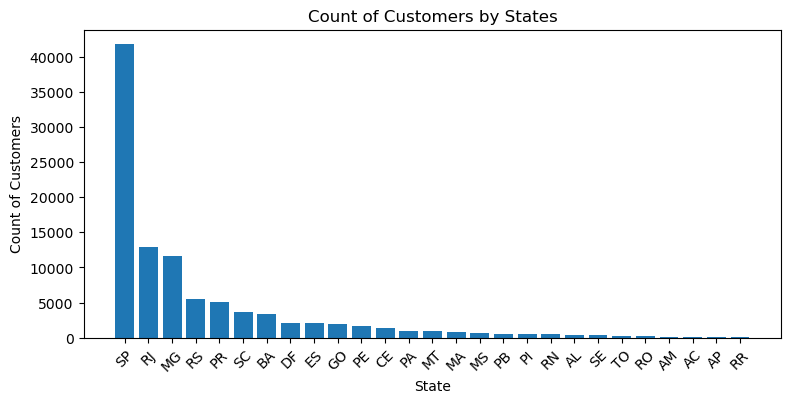

In [8]:
query = """SELECT customer_state as City, count(customer_id) as totalcustomer FROM e_commerce.customers group by customer_state order by totalcustomer desc"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
# df = pd.DataFrame(data)   # columns=["Category","Sales"]
#"Total sales per category : ",data
#data
df = pd.DataFrame(data,columns=["State", "Customers"])
plt.bar(df['State'],df['Customers'])
plt.title("Count of Customers by States")
plt.xlabel('State')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.ylabel('Count of Customers')
plt.gcf().set_size_inches(9, 4)
#plt.figure(figsize=(10, 5))
plt.show()

### 6>. Calculate the number of orders per month in 2018.

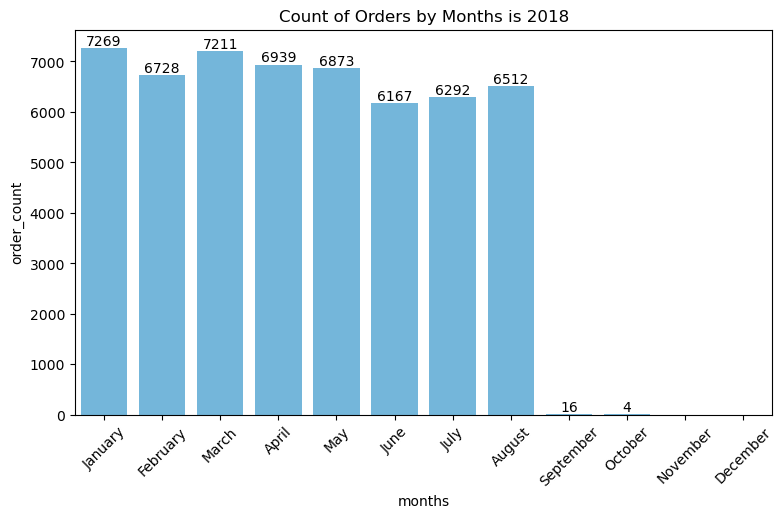

In [9]:
query = """ SELECT monthname(order_purchase_timestamp) as months, count(order_id) as order_count FROM e_commerce.orders where year(order_purchase_timestamp) = 2018 group by months order by months asc"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
df = pd.DataFrame(data,columns=["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October","November","December"]
ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df,order=o,color="#63bbeb")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0],rotation = 0)
plt.gcf().set_size_inches(9, 5)
plt.title("Count of Orders by Months is 2018")
plt.show()

### Find the average number of products per order, grouped by customer city.

In [10]:
query = """with count_per_orders as (SELECT o.order_id,o.customer_id, count(oi.order_id) as oc FROM e_commerce.orders o 
join e_commerce.order_items oi on o.order_id = oi.order_id
group by o.order_id,o.customer_id)

SELECT cc.customer_city, round(avg(count_per_orders.oc),2) as avg_orders FROM e_commerce.customers cc
join count_per_orders on cc.customer_id = count_per_orders.customer_id
group by cc.customer_city order by avg_orders desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["Customers City", "Average Products/Orders"])
df.head(10)

,Customers City,Average Products/Orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


### Calculate the percentage of total revenue contributed by each product category.

In [11]:
query = """SELECT UPPER(p.product_category) AS Category, ROUND((SUM(pm.payment_value)/(SELECT sum(payment_value) FROM e_commerce.payments))*100,2) AS sales_percentage
FROM e_commerce.order_items oi
JOIN e_commerce.products p ON oi.product_id = p.product_id
JOIN e_commerce.payments pm 
ON oi.order_id = pm.order_id GROUP BY p.product_category
ORDER BY sales_percentage DESC"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
df = pd.DataFrame(data,columns=["Category", "percentage distribution"])
df.head(10)

,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


### Identify the correlation between product price and the number of times a product has been purchased.

In [14]:
query = """SELECT p.product_category,count(oi.product_id),round(avg(oi.price),2) FROM e_commerce.products p
join e_commerce.order_items oi on p.product_id = oi.product_id
group by p.product_category"""
# Execute the query
cur.execute(query)
# Fetch all results
data = cur.fetchall()
# Print the results
df = pd.DataFrame(data,columns=["Category", "order_count","price"])
arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


### Calculate the total revenue generated by each seller, and rank them by revenue.

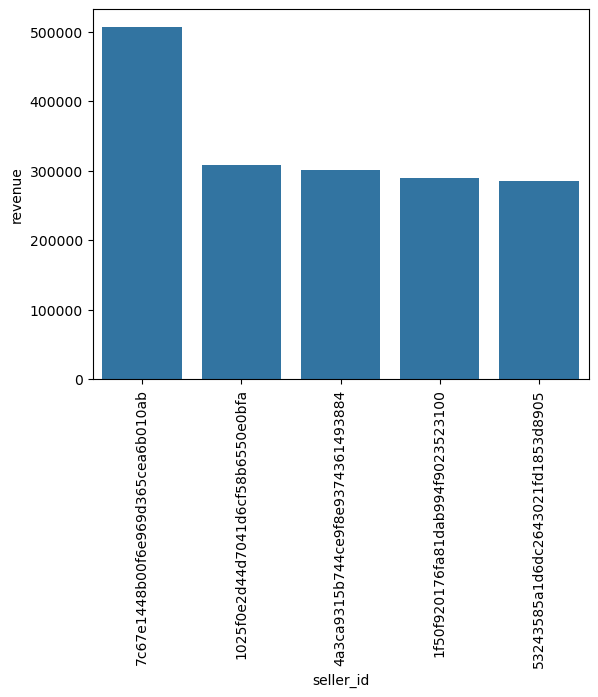

In [12]:
query = """SELECT *,dense_rank() over(order by revenue desc) as rn from
(SELECT oi.seller_id as seller_id, round(SUM(p.payment_value),2) AS revenue FROM e_commerce.order_items oi 
JOIN e_commerce.payments p ON oi.order_id = p.order_id GROUP BY oi.seller_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

### Calculate the moving average of order values for each customer over their order history.

In [5]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


###  Calculate the cumulative sales per month for each year.

In [17]:
query = """select years , months , payments, round(sum(payments) over(order by years,months),2) as cumulative_sales from
(select year(o.order_purchase_timestamp) as years,month(o.order_purchase_timestamp) as months, round(sum(p.payment_value),2) as payments 
from e_commerce.orders o join e_commerce.payments p on o.order_id = p.order_id group by years, months order by years , months) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["years","months","payments","cumulative_sales"])
df.head()

,years,months,payments,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


### Calculate the year-over-year growth rate of total sales.

In [22]:
# query = """with a as (select year(o.order_purchase_timestamp) as years, round(sum(p.payment_value),2) as payments 
# from e_commerce.orders o join e_commerce.payments p on o.order_id = p.order_id group by years order by years)

# select years, payments, lag(payments) over(order by years) as previous_year from a
# """
query = """with a as (select year(o.order_purchase_timestamp) as years, round(sum(p.payment_value),2) as payments 
from e_commerce.orders o join e_commerce.payments p on o.order_id = p.order_id group by years order by years)

-- select years, lag(payments) over(order by years) as previous_year from a
select years, round(((payments - lag(payments) over(order by years)) / lag(payments) over(order by years))*100,2) as yoy_growth from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["years","yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


### Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [6]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id"""
cur.execute(query)
data = cur.fetchall()
data

[(None,)]

### Identify the top 3 customers who spent the most money in each year.

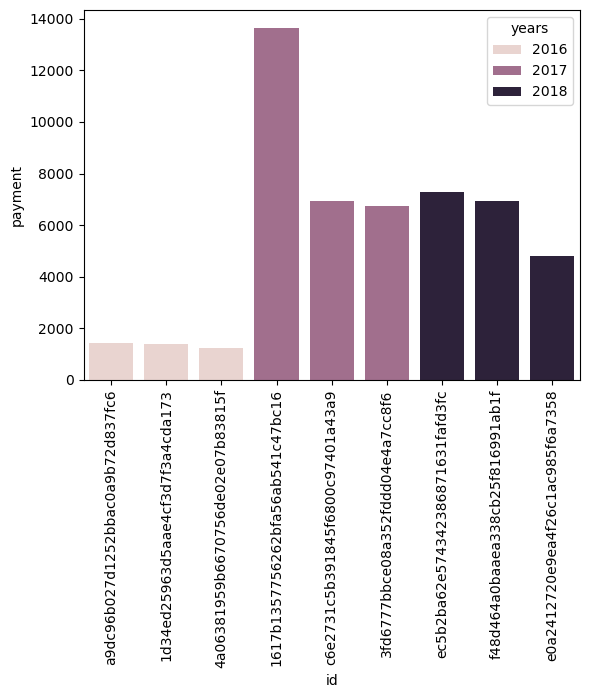

In [11]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["years","id","payment","rank"])
sns.barplot(x='id',y='payment',data=df,hue='years')
plt.xticks(rotation=90)
plt.show()